In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
df = pd.read_csv('/content/placement.csv')

In [48]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [50]:
df.shape

(100, 4)

In [51]:
df = df.iloc[:,1:]

In [52]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [53]:
df["gender"] = [1 if i % 2 == 0 else 0 for i in range(len(df))]  # Alternating 1s and 0s
df["stat"] = [0 if i % 2 == 0 else 1 for i in range(len(df))]    # Alternating 0s and 1s



In [54]:
df.head()

,cgpa,iq,placement,gender,stat
0,6.8,123.0,1,1,0
1,5.9,106.0,0,0,1
2,5.3,121.0,0,1,0
3,7.4,132.0,1,0,1
4,5.8,142.0,0,1,0


In [55]:
# Set the style for seaborn
sns.set(style="darkgrid")

<ipython-input-56-574a1cd3ff27>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=df, palette="coolwarm")


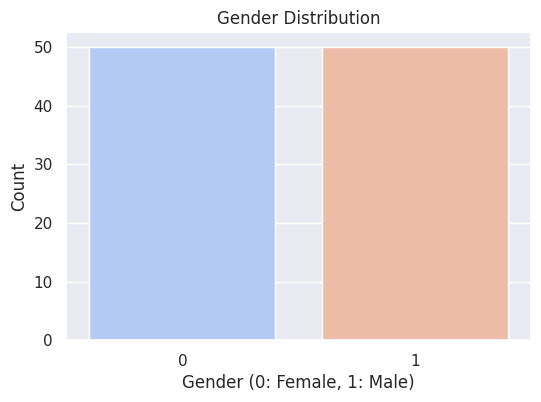

In [56]:
# Plot 1: Count plot of Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="gender", data=df, palette="coolwarm")
plt.title("Gender Distribution")
plt.xlabel("Gender (0: Female, 1: Male)")
plt.ylabel("Count")
plt.show()

<ipython-input-57-907adb7c5ca8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="placement", data=df, palette="viridis")


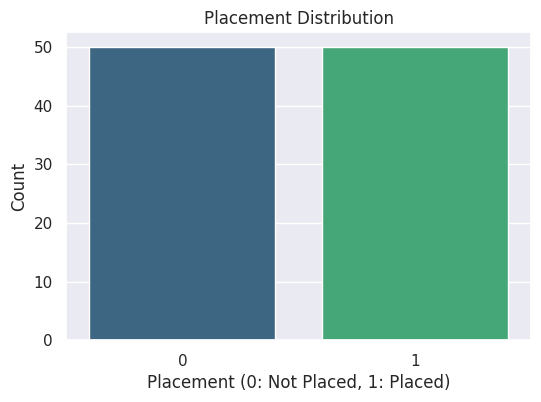

In [57]:

# Plot 2: Count plot of Placement distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="placement", data=df, palette="viridis")
plt.title("Placement Distribution")
plt.xlabel("Placement (0: Not Placed, 1: Placed)")
plt.ylabel("Count")
plt.show()

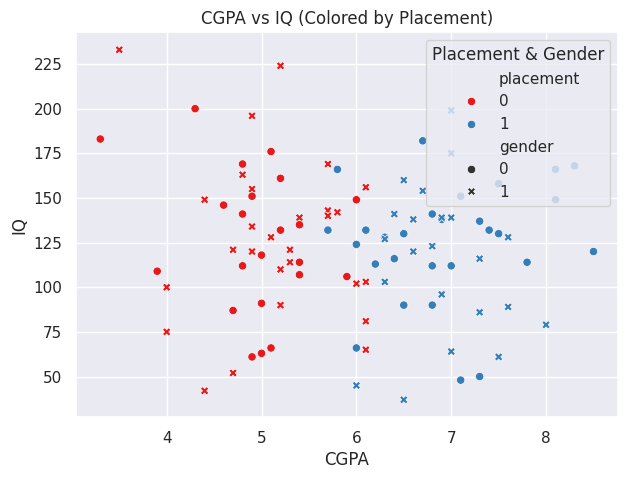

In [58]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x="cgpa", y="iq", hue="placement", style="gender", data=df, palette="Set1")
plt.title("CGPA vs IQ (Colored by Placement)")
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.legend(title="Placement & Gender")
plt.show()

In [59]:
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target variable


In [60]:
X

,cgpa,iq,placement,gender
0,6.8,123.0,1,1
1,5.9,106.0,0,0
2,5.3,121.0,0,1
3,7.4,132.0,1,0
4,5.8,142.0,0,1
...,...,...,...,...
95,4.3,200.0,0,0
96,4.4,42.0,0,1
97,6.7,182.0,1,0
98,6.3,103.0,1,1


In [61]:
y.shape

(100,)

In [66]:
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
X_train

,cgpa,iq,placement,gender
55,7.8,114.0,1,0
88,4.4,149.0,0,1
26,7.0,199.0,1,1
42,7.6,89.0,1,1
69,8.5,120.0,1,0
...,...,...,...,...
60,6.9,139.0,1,1
71,6.1,132.0,1,0
14,6.1,103.0,0,1
92,5.2,110.0,0,1


In [68]:
y_train

,stat
55,1
88,0
26,0
42,0
69,1
...,...
60,0
71,1
14,0
92,0


In [69]:
X_test

,cgpa,iq,placement,gender
83,7.5,130.0,1,0
53,8.3,168.0,1,0
70,6.3,127.0,1,1
45,6.0,66.0,1,0
44,7.5,61.0,1,1
39,4.6,146.0,0,0
22,4.9,120.0,0,1
80,4.9,196.0,0,1
10,6.0,45.0,1,1
0,6.8,123.0,1,1


In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
X_train

,cgpa,iq,placement,gender
55,7.8,114.0,1,0
88,4.4,149.0,0,1
26,7.0,199.0,1,1
42,7.6,89.0,1,1
69,8.5,120.0,1,0
...,...,...,...,...
60,6.9,139.0,1,1
71,6.1,132.0,1,0
14,6.1,103.0,0,1
92,5.2,110.0,0,1


In [72]:
y_train

,stat
55,1
88,0
26,0
42,0
69,1
...,...
60,0
71,1
14,0
92,0


In [73]:
X_test

,cgpa,iq,placement,gender
83,7.5,130.0,1,0
53,8.3,168.0,1,0
70,6.3,127.0,1,1
45,6.0,66.0,1,0
44,7.5,61.0,1,1
39,4.6,146.0,0,0
22,4.9,120.0,0,1
80,4.9,196.0,0,1
10,6.0,45.0,1,1
0,6.8,123.0,1,1


In [74]:
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [75]:
y_pred = clf.predict(X_test_scaled)

In [76]:
y_test

,stat
83,1
53,1
70,0
45,1
44,0
39,1
22,0
80,0
10,0
0,0


In [77]:
y_pred = clf.predict(X_test_scaled)


In [79]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 1.00


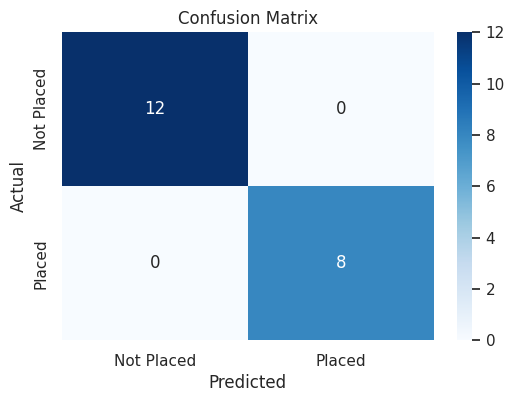

In [80]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["Not Placed", "Placed"], yticklabels=["Not Placed", "Placed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [81]:
import pickle

In [82]:
pickle.dump(clf,open('model.pkl','wb'))